# Zoning and its impact on the housing market

### By Robert Bangiyev

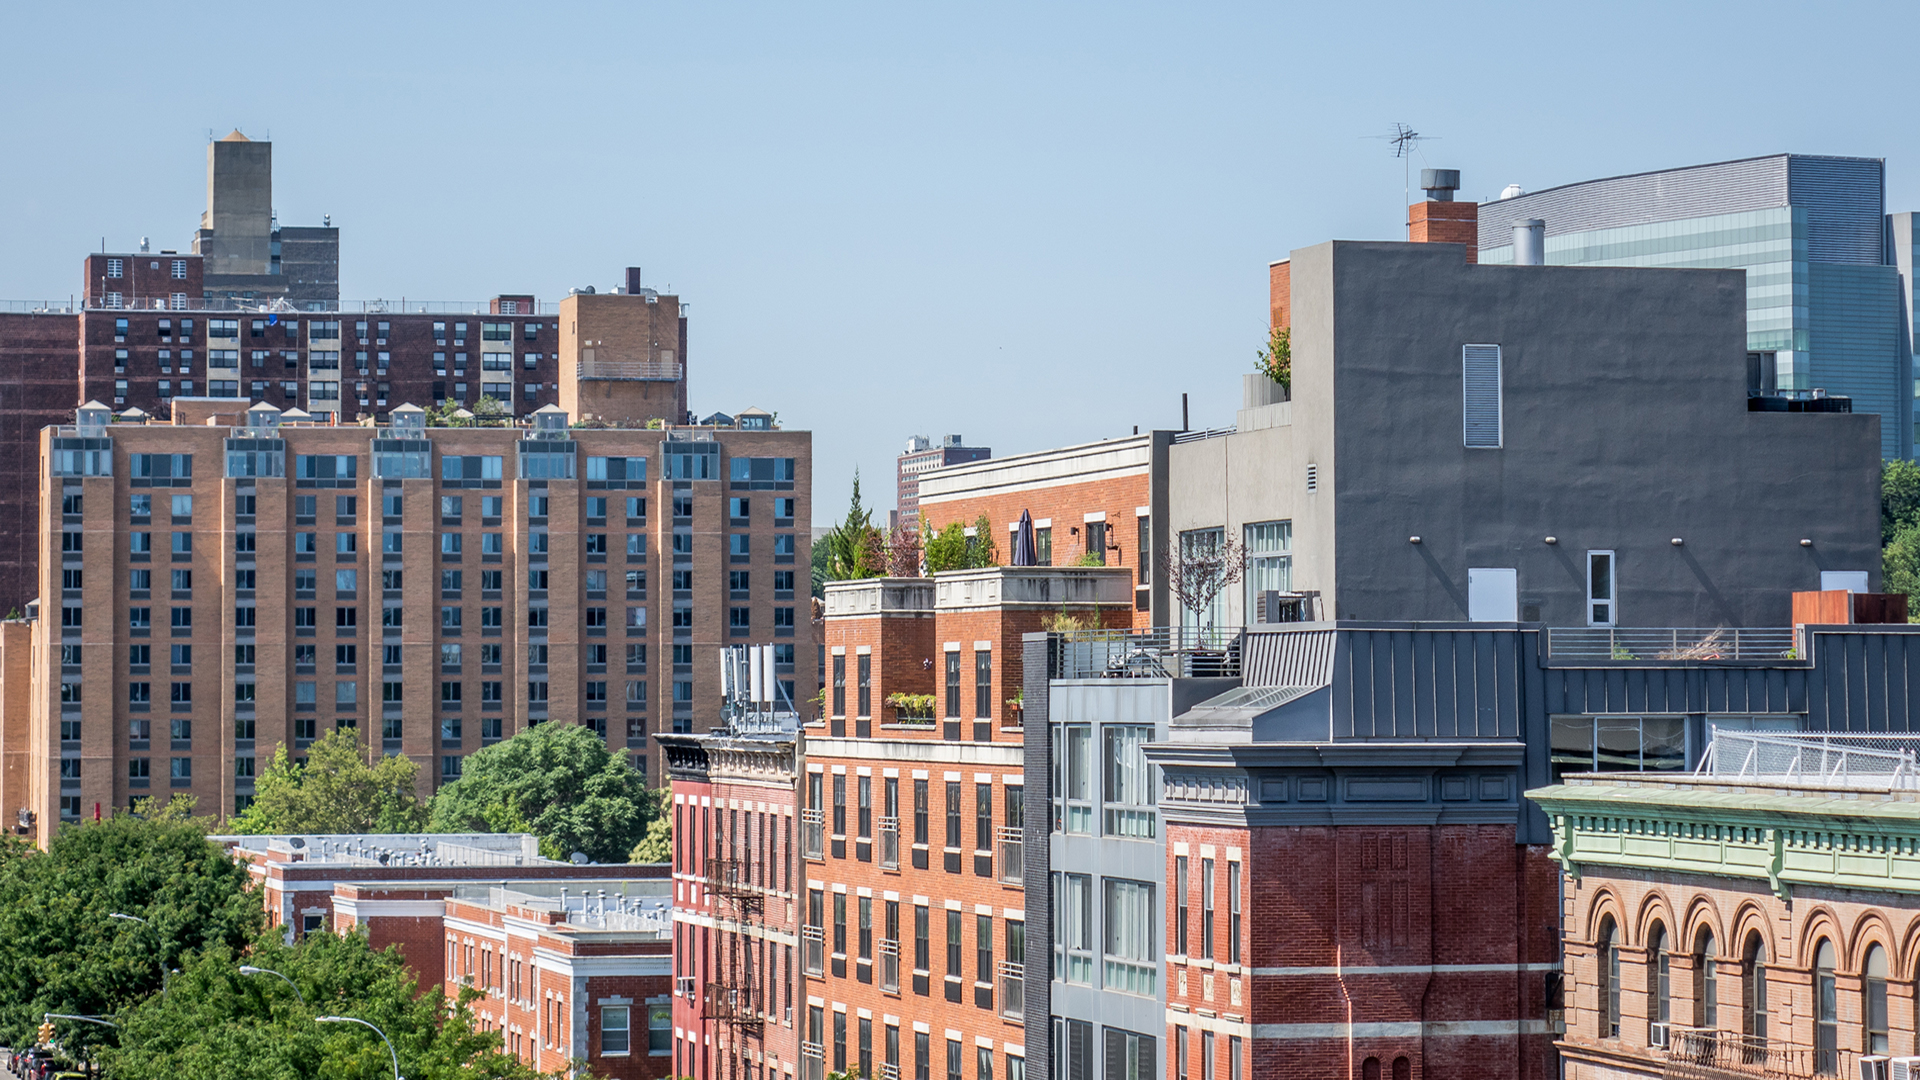

## Overview

### Hypothesis:
As zoning laws are made more stringent, the amount of new buildings constructed will fall, and as the amount of new buildings constructed declines, and population rises, the cost of housing will climb.

### Hypothesis Testing:

The hypothesis was tested using data on the population of NYC over time, data on all the buildings which were constructed in NYC, and data of property sales in NYC. Pandas was used to read, clean, and filter the data. Rows containing missing values in important columns were dropped, and rows were grouped by a certain column to retrieve the desired DataFrame. Matplotlib was used to create visualizations showing the change in property prices, buildings constructed, and population over time. Bar graphs were created using matplotlib to show the number of buildings constructed in each borough's zoning district type, and line graphs were used to visualize the change in population, sale price, and building construction over time. If within the same time frame, for each of the five boroughs, the population was shown to be increasing, the number of buildings being built was shown to be decreasing, and the average price of property in that borough was shown to be rising, then a relationship between population, building construction, and property sale price would be established. Furthermore, if in each borough, the number of new buildings constructed were to fall after large zoning regulations were introduced, then stringent zoning regulations would be revealed to have a negative impact on the housing supply.

### Datasets

1. [Buildings Built in NYC History](https://www.kaggle.com/new-york-city/nyc-buildings)

This dataset contains a csv file for each of the five NYC boroughs, Queens, Manhattan, Bronx, Brooklyn, and Staten Island. Each entry in the dataset is a building that was constructed in NYC history. Each building has a set of features, including school district, zip code, and address, but the most relevant columns are ZoneDist1, which is the zoning district classification of the area the building was built on, and YearBuilt, the year the building was built. The dataset contains data going as far back as the 1800s for some of the boroughs. However, it contains a non-negligible number of rows where the value for YearBuilt is 0. Since NYC did not exist when the year was 0, one can assume that this is just a placeholder for missing values, which would have an impact on the results if not dealt with.

2. [Annual Sales](https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page)

This is not one dataset, but many, spread out over many excel files. There is one excel file for each borough, for each year, from 2003 to 2020, for a total of 90 excel sheets. Each file contains tens of thousands of rows. Each entry in the dataset is a property sale for that specific year. Each property sale contains information about itself, like the neighborhood, and the address, but the most relevant column for this project is SALE PRICE, which, as the name suggests, is how much the property was sold for. Each dataset in this collection contains a sizeable number of rows where the SALE PRICE is 0. It is hard to tell whether that was just a placeholder for a missing value, or if property was being sold for free, but no matter the reason, the rows would an impact on the results, and must be handled.

3. [NYC Population](https://www.kaggle.com/new-york-city/new-york-city-population?select=new-york-city-population-by-borough-1950-2040.csv)

This dataset contains the population of NYC over the decades, for each of the five boroughs. Each entry in the dataset is either a borough or the city itself. Each entry has columns for each decade, going as far back as 1950, and the columns contain the population of the row at that time. The relevant columns are 2000, 2010, and 2020, as those columns contain the entire time frame for when sales in NYC were recorded. A problem with the dataset is that the year values being columns would create complications when trying to create visualizations, which should be dealt with.

### Techniques
I will be using the Python Pandas library to read the datasets, filter them, and clean them. I will be using it to deal with the Buildings Built in NYC History datasets by dropping rows where the YearBuilt value is 0. It will also be used to deal with dropping rows in the Annual Sales datasets where SALE PRICE is 0. For NYC Population, Pandas will be used to alter the DataFrame to make it easier to create visualizations. Matplotlib will be used to create bar graphs showing the number of buildings built in each zone district category, and line graphs showing the change in buildings built, population, and average sale price over time. Specific uses of these tools are further explained below, right before the code it relates to. I plan on dealing with visualizing the bar graphs first, but all the cleaning will be done before any further visualizations. At the end, the results will be compared to the hypothesis, and depending on the results, the next steps will be outlined.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The csv files containing information on building construction were the first to be read

In [2]:
queens = pd.read_csv('QN.csv', low_memory=False)
brooklyn = pd.read_csv('BK.csv', low_memory=False)
bronx = pd.read_csv('BX.csv', low_memory=False)
manhattan = pd.read_csv('MN.csv', low_memory=False)
staten = pd.read_csv('SI.csv', low_memory=False)

Here is what the data looks like

In [3]:
queens.head(5)

Borough  Block  Lot   CD  CT2010  CB2010  SchoolDist  Council  ZipCode  \
0      QN      6    1  402     1.0     NaN        30.0     26.0  11101.0   
1      QN      6    3  402     1.0  1015.0        30.0     26.0  11101.0   
2      QN      6    8  402     1.0  1011.0        30.0     26.0  11101.0   
3      QN      6   20  402     1.0     NaN        30.0     26.0  11101.0   
4      QN      6   30  402     1.0     NaN        30.0     26.0  11101.0   

  FireComp  ...    YCoord  ZoneMap  ZMCode  Sanborn   TaxMap EDesigNum  \
0     L115  ...       NaN       8d       Y  401 011  40101.0       NaN   
1     L115  ...  209421.0       8d     NaN  401 011  40101.0       NaN   
2     L115  ...  209867.0       8d     NaN  401 011  40101.0       NaN   
3     L115  ...       NaN       8d     NaN  401 011  40101.0       NaN   
4     L115  ...       NaN       8d     NaN  401 011  40101.0       NaN   

         APPBBL     APPDate PLUTOMapID Version  
0  4.000060e+09  09/20/2013          1    16V2  
1  0.000000e+00         NaN          1    16V2  
2  4.000060e+09  08/07/2013          1    16V2  
3  4.000060e+09  09/20/2013          1    16V2  
4  4.000060e+09  09/20/2013          1    16V2  

[5 rows x 84 columns]

In [4]:
queens[queens['YearBuilt'] == 0]

Borough  Block  Lot   CD  CT2010  CB2010  SchoolDist  Council  ZipCode  \
0           QN      6    1  402    1.00     NaN        30.0     26.0  11101.0   
1           QN      6    3  402    1.00  1015.0        30.0     26.0  11101.0   
3           QN      6   20  402    1.00     NaN        30.0     26.0  11101.0   
4           QN      6   30  402    1.00     NaN        30.0     26.0  11101.0   
6           QN      6   40  402    1.00     NaN        30.0     26.0  11101.0   
...        ...    ...  ...  ...     ...     ...         ...      ...      ...   
324396      QN  16350  364  414  916.01     NaN        27.0     32.0      NaN   
324397      QN  16350  366  414  916.01     NaN        27.0     32.0      NaN   
324398      QN  16350  368  414  916.01     NaN        27.0     32.0      NaN   
324399      QN  16350  370  414  916.01     NaN        27.0     32.0      NaN   
324400      QN  16350  372  414  916.01     NaN        27.0     32.0      NaN   

       FireComp  ...    YCoord  ZoneMap  ZMCode  Sanborn   TaxMap EDesigNum  \
0          L115  ...       NaN       8d       Y  401 011  40101.0       NaN   
1          L115  ...  209421.0       8d     NaN  401 011  40101.0       NaN   
3          L115  ...       NaN       8d     NaN  401 011  40101.0       NaN   
4          L115  ...       NaN       8d     NaN  401 011  40101.0       NaN   
6          L115  ...       NaN       8d     NaN  401 011  40101.0       NaN   
...         ...  ...       ...      ...     ...      ...      ...       ...   
324396     E329  ...       NaN      29d     NaN  421 072  46303.0       NaN   
324397     E329  ...       NaN      29b     NaN  421 072  46303.0       NaN   
324398     E329  ...       NaN      29b     NaN  421 072  46303.0       NaN   
324399     E329  ...       NaN      30d     NaN  421 072  46303.0       NaN   
324400     E329  ...       NaN      30d     NaN  421 072  46303.0       NaN   

              APPBBL     APPDate PLUTOMapID Version  
0       4.000060e+09  09/20/2013          1    16V2  
1       0.000000e+00         NaN          1    16V2  
3       4.000060e+09  09/20/2013          1    16V2  
4       4.000060e+09  09/20/2013          1    16V2  
6       4.000060e+09  09/20/2013          1    16V2  
...              ...         ...        ...     ...  
324396  0.000000e+00         NaN          1    16V2  
324397  0.000000e+00         NaN          1    16V2  
324398  0.000000e+00         NaN          1    16V2  
324399  0.000000e+00         NaN          1    16V2  
324400  0.000000e+00         NaN          1    16V2  

[12800 rows x 84 columns]

In the DataFrame for Queens, there are 12800 rows where the YearBuilt column has a value of 0. Knowing that a value of 0 cannot be valid, the only option remaining was to get rid of all rows where YearBuilt was 0

In [5]:
queens = queens[queens['YearBuilt'] != 0]
brooklyn = brooklyn[brooklyn['YearBuilt'] != 0]
bronx = bronx[bronx['YearBuilt'] != 0]
manhattan = manhattan[manhattan['YearBuilt'] != 0]
staten = staten[staten['YearBuilt'] != 0]

Now that the DataFrames for each borough were cleaned, it was time to create visualizations. To make things easier, a function was made. This function allows for the creation of a bar graph visualizing the number of buildings constructed in each residential district. It takes in the DataFrame for the specific borough, the borough name, and the color which will be used for the bars. Then, it filters the DataFrame to only include rows where the first letter of the ZoneDist1 value is R, meaning that the building was built in a residential district. Having completed the filtering, groups the rows by ZoneDist1 to find the number of buildings built in each type of zoning district. It then creates a bar graph, with the x-axis being the zoning district category, and the y-axis being the number of buildings built in each zoning district category.

In [6]:
def createBar(df, borough, color):
    dfBar = df[df['ZoneDist1'].str[0] == 'R']
    dfBar = dfBar.groupby(['ZoneDist1'], as_index=False).size()
    plt.figure(figsize=(20, 10))
    plt.bar(dfBar['ZoneDist1'], dfBar['size'], color=color)
    plt.xlabel('Zoning District')
    plt.ylabel('Number of Buildings Built')
    plt.title('Buildings Built in ' + borough)

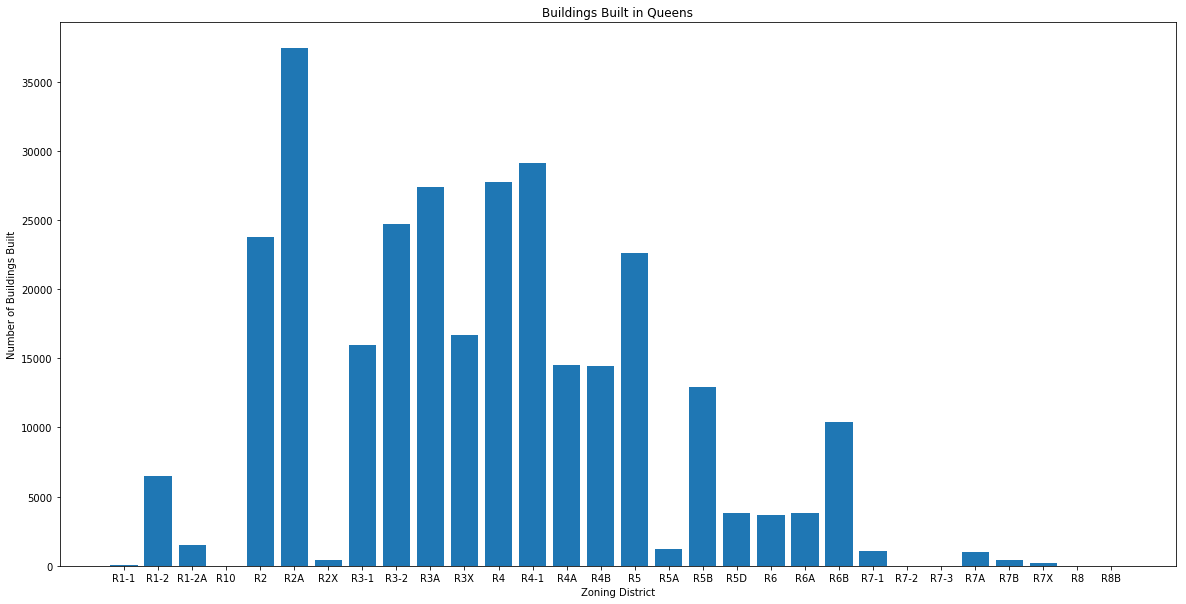

In [7]:
createBar(queens, 'Queens', '#1f77b4')

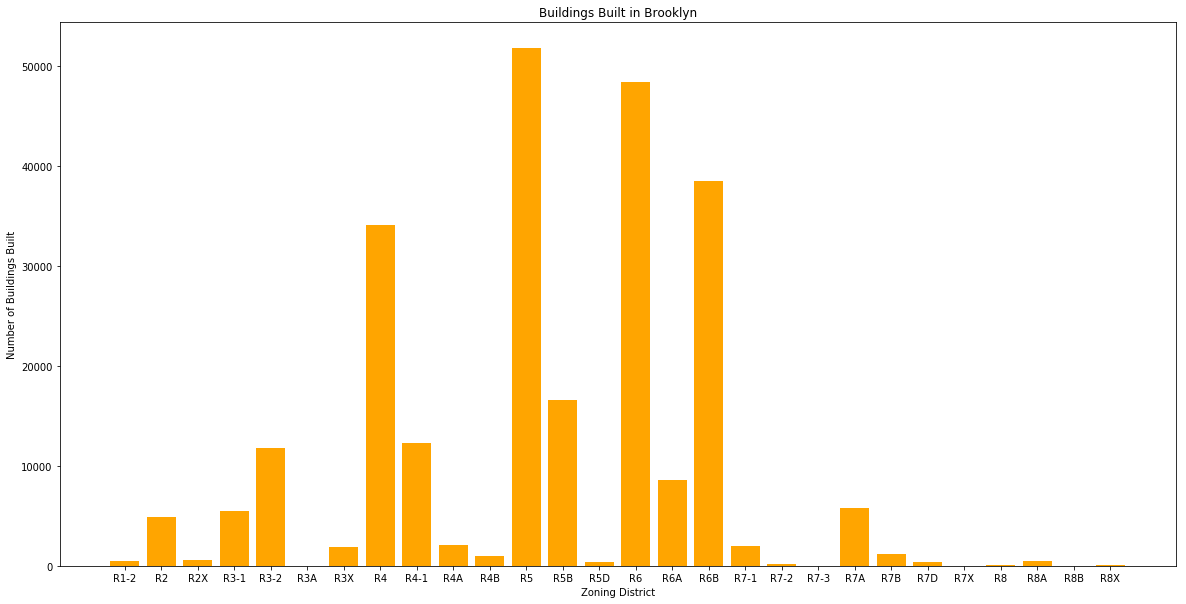

In [8]:
createBar(brooklyn, 'Brooklyn', 'orange')

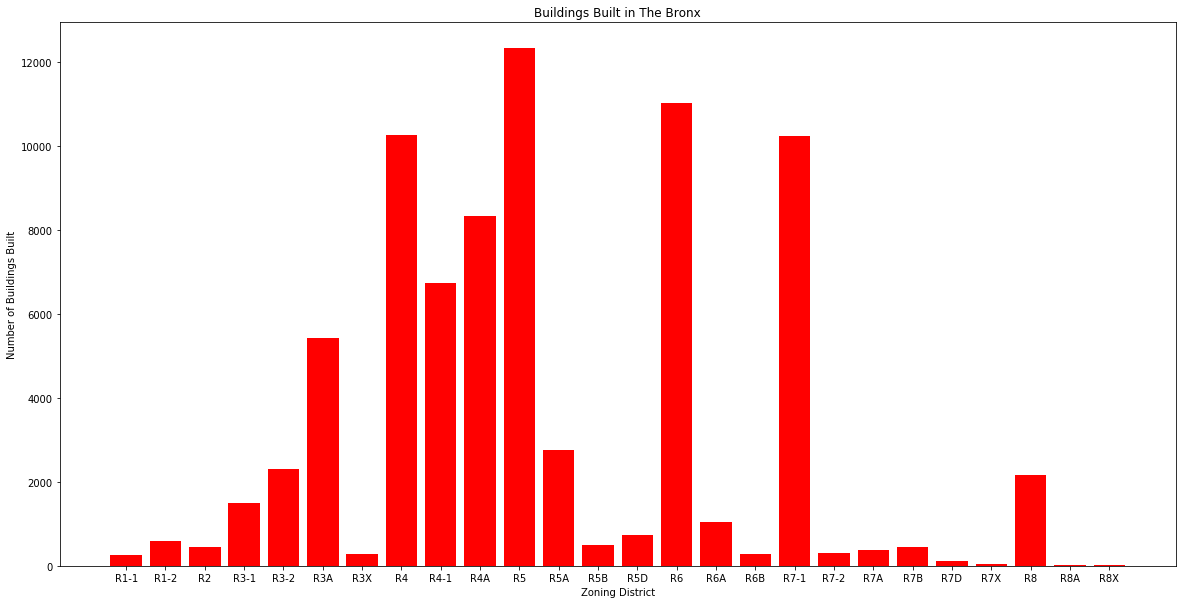

In [9]:
createBar(bronx, 'The Bronx', 'red')

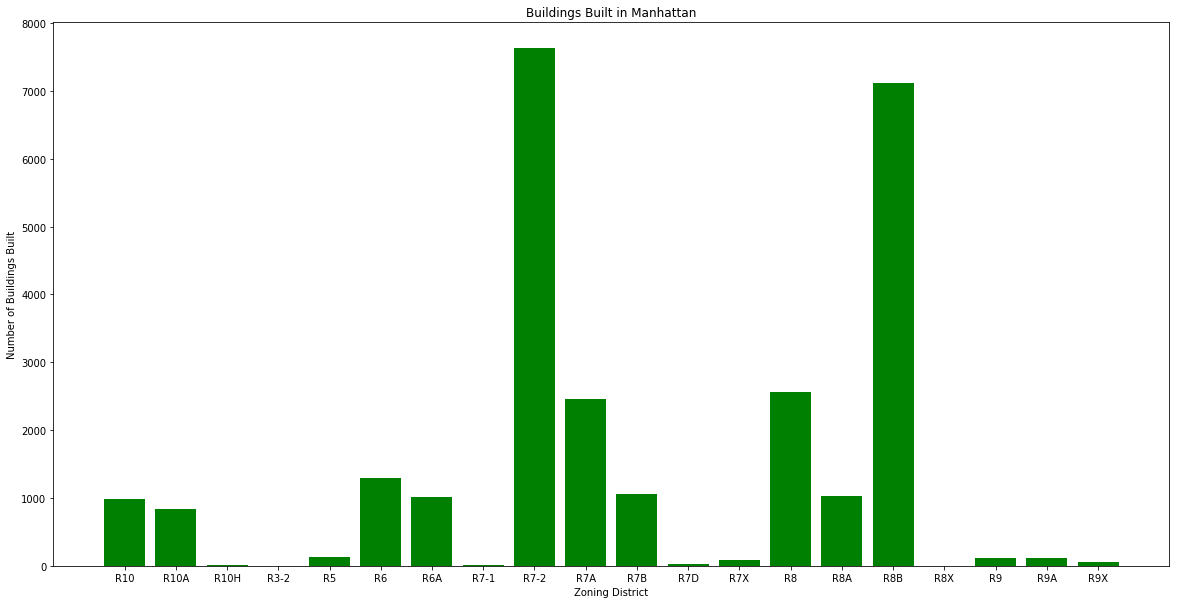

In [10]:
createBar(manhattan, 'Manhattan', 'green')

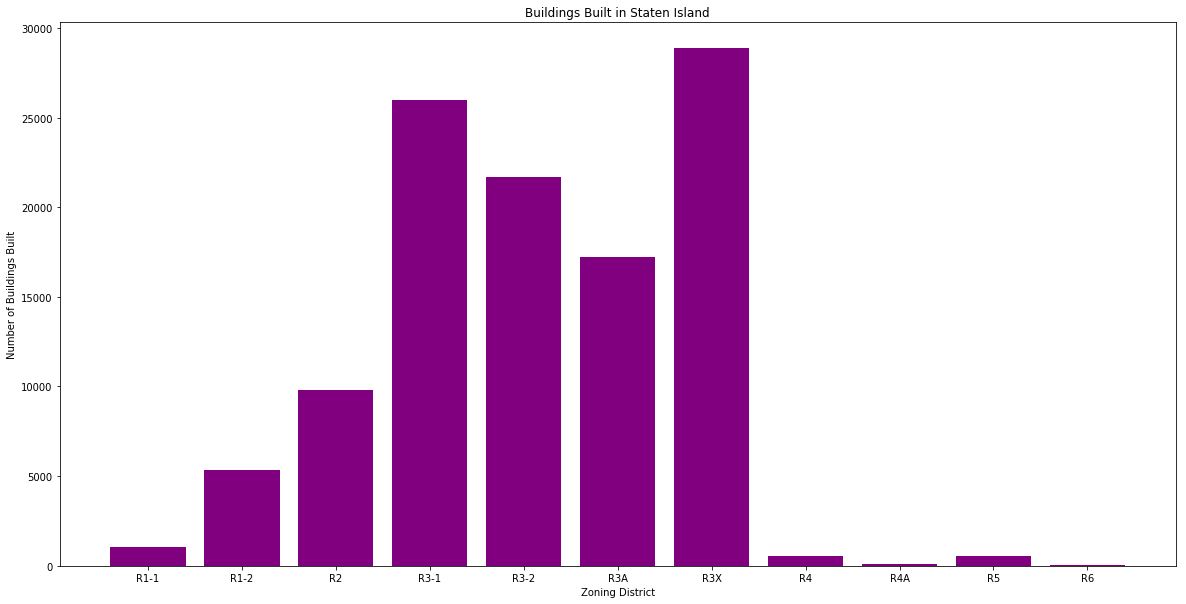

In [11]:
createBar(staten, 'Staten Island', 'purple')

#### Immediate Observations:
Most of the boroughs have a healthy range of zoning district categories in which buildings are being constructed, with R2 to R7 containing most of the buildings constructed. The two outliers are Manhattan and Staten Island. Manhattan does not appear to have a single building built in a district zoned below R5, with most buildings being built in R7-2 and R8B districts. Staten Island is the opposite, having most of its buildings built in districts zoned below R4, with a few being built in R4 to R6.

This function handles the cleaning and filtering which is needed for each of the excel files for each borough. It reads the excel file, skipping the number of rows that need to be skipped, filters to include rows where the property was not sold for free, creates a new column containing the borough, and then finds the mean of all sales for that dataset, before creating a new column specifying the year, and returning the DataFrame. Rows where the SALE PRICE was 0 were dropped because they would heavily skew the results, and because it is most likely a placeholder for a missing value. Even if it were not, a property being given away for free would have little relevance to the average property sale price at the time, as one would assume that the property giveaway would have been done no matter what the average sale price was. There is a default parameter, which only exists to handle special excel files where each column has a newline character in its name, which would make things confusing. If the parameter is made true, an exact copy of the SALE PRICE\n column is made, only with no newline character in the column name.

In [12]:
def handleSales(filename, borough, skipcount, year, handleSpecial=False):
    a = pd.read_excel(filename, skiprows=skipcount)
    if handleSpecial:
        a['SALE PRICE'] = a['SALE PRICE\n']
    a = a[a['SALE PRICE'] != 0]
    a['BOROUGH'] = borough
    a = a.groupby(['BOROUGH'])['SALE PRICE'].mean().reset_index()
    a['Year'] = year
    return a

The process of applying the function to all the excel files for that specific borough had to be applied to the other four as well.

In [13]:
a = handleSales('sales_manhattan_03.xls', 'Manhattan', 3, 2003)
b = handleSales('sales_manhattan_04.xls', 'Manhattan', 3, 2004)
c = handleSales('sales_manhattan_05.xls', 'Manhattan', 3, 2005)
d = handleSales('sales_manhattan_06.xls', 'Manhattan', 3, 2006)
e = handleSales('sales_2007_manhattan.xls', 'Manhattan', 3, 2007)
f = handleSales('sales_2008_manhattan.xls', 'Manhattan', 3, 2008)
g = handleSales('2009_manhattan.xls', 'Manhattan', 3, 2009)
h = handleSales('2010_manhattan.xls', 'Manhattan', 3, 2010)
i = handleSales('2011_manhattan.xls', 'Manhattan', 4, 2011)
j = handleSales('2012_manhattan.xls', 'Manhattan', 4, 2012, handleSpecial=True)
k = handleSales('2013_manhattan.xls', 'Manhattan', 4, 2013, handleSpecial=True) 
l = handleSales('2014_manhattan.xls', 'Manhattan', 4, 2014, handleSpecial=True)
m = handleSales('2015_manhattan.xls', 'Manhattan', 4, 2015, handleSpecial=True)
n = handleSales('2016_manhattan.xls', 'Manhattan', 4, 2016, handleSpecial=True)
o = handleSales('2017_manhattan.xls', 'Manhattan', 4, 2017, handleSpecial=True)
p = handleSales('2018_manhattan.xls', 'Manhattan', 4, 2018, handleSpecial=True)
q = handleSales('2019_manhattan.xls', 'Manhattan', 4, 2019, handleSpecial=True)
r = handleSales('2020_manhattan.xls', 'Manhattan', 6, 2020)

After all the files for a borough were read and cleaned, all DataFrames for the borough were concatenated, and only the columns necessary for the analysis were kept.

In [14]:
manhattansales = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l, m, o, p, q, r]).reset_index()
manhattansales = manhattansales[['BOROUGH', 'Year', 'SALE PRICE']]
manhattansales

BOROUGH  Year    SALE PRICE
0   Manhattan  2003  1.208391e+06
1   Manhattan  2004  1.594848e+06
2   Manhattan  2005  2.069720e+06
3   Manhattan  2006  2.420361e+06
4   Manhattan  2007  2.946473e+06
5   Manhattan  2008  2.005712e+06
6   Manhattan  2009  1.475052e+06
7   Manhattan  2010  2.046167e+06
8   Manhattan  2011  2.183259e+06
9   Manhattan  2012  2.477902e+06
10  Manhattan  2013  2.599118e+06
11  Manhattan  2014  3.494882e+06
12  Manhattan  2015  3.734229e+06
13  Manhattan  2017  3.203235e+06
14  Manhattan  2018  4.020291e+06
15  Manhattan  2019  4.631874e+06
16  Manhattan  2020  4.375705e+06

After the concatenation, the DataFrame containing information about buildings built in that borough was grouped by year, to see how many buildings were built each year. The DataFrame was then filtered to only include data from 2003 to 2020, which was the time frame of the sales dataset.

In [15]:
manhattanbuilt = manhattan.groupby(['YearBuilt']).size().reset_index()
manhattanbuilt['NumBuilt'] = manhattanbuilt[0]
manhattanbuilt = manhattanbuilt[['YearBuilt', 'NumBuilt']]
manhattanbuiltfinal = manhattanbuilt[(manhattanbuilt['YearBuilt'] >= 2003) & (manhattanbuilt['YearBuilt'] != 2040)].reset_index()
manhattanbuiltfinal = manhattanbuiltfinal[['YearBuilt', 'NumBuilt']]

In [16]:
manhattanbuiltfinal

YearBuilt  NumBuilt
0        2003       130
1        2004       103
2        2005       144
3        2006       117
4        2007       132
5        2008       153
6        2009        75
7        2010        69
8        2011        45
9        2012        88
10       2013        96
11       2014        85
12       2015        24
13       2016         3

In [17]:
a1 = handleSales('sales_bronx_03.xls', 'Bronx', 3, 2003)
b1 = handleSales('sales_bronx_04.xls', 'Bronx', 3, 2004)
c1 = handleSales('sales_bronx_05.xls', 'Bronx', 3, 2005)
d1 = handleSales('sales_bronx_06.xls', 'Bronx', 3, 2006)
e1 = handleSales('sales_2007_bronx.xls', 'Bronx', 3, 2007)
f1 = handleSales('sales_2008_bronx.xls', 'Bronx', 3, 2008)
g1 = handleSales('2009_bronx.xls', 'Bronx', 3, 2009)
h1 = handleSales('2010_bronx.xls', 'Bronx', 3, 2010)
i1 = handleSales('2011_bronx.xls', 'Bronx', 4, 2011)
j1 = handleSales('2012_bronx.xls', 'Bronx', 4, 2012, handleSpecial=True)
k1 = handleSales('2013_bronx.xls', 'Bronx', 4, 2013, handleSpecial=True) 
l1 = handleSales('2014_bronx.xls', 'Bronx', 4, 2014, handleSpecial=True)
m1 = handleSales('2015_bronx.xls', 'Bronx', 4, 2015, handleSpecial=True)
n1 = handleSales('2016_bronx.xls', 'Bronx', 4, 2016, handleSpecial=True)
o1 = handleSales('2017_bronx.xls', 'Bronx', 4, 2017, handleSpecial=True)
p1 = handleSales('2018_bronx.xls', 'Bronx', 4, 2018, handleSpecial=True)
q1 = handleSales('2019_bronx.xls', 'Bronx', 4, 2019, handleSpecial=True)
r1 = handleSales('2020_bronx.xls', 'Bronx', 6, 2020)

In [18]:
bronxsales = pd.concat([a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, o1, p1, q1, r1]).reset_index()
bronxsales = bronxsales[['BOROUGH', 'Year', 'SALE PRICE']]
bronxsales

BOROUGH  Year    SALE PRICE
0    Bronx  2003  3.505516e+05
1    Bronx  2004  4.345002e+05
2    Bronx  2005  5.029386e+05
3    Bronx  2006  5.443553e+05
4    Bronx  2007  7.112724e+05
5    Bronx  2008  5.989150e+05
6    Bronx  2009  4.767908e+05
7    Bronx  2010  6.292008e+05
8    Bronx  2011  6.022533e+05
9    Bronx  2012  7.863523e+05
10   Bronx  2013  7.473925e+05
11   Bronx  2014  8.712298e+05
12   Bronx  2015  9.231017e+05
13   Bronx  2017  7.997133e+05
14   Bronx  2018  8.430681e+05
15   Bronx  2019  1.018869e+06
16   Bronx  2020  2.356939e+06

In [19]:
bronxbuilt = bronx.groupby(['YearBuilt']).size().reset_index()
bronxbuilt['NumBuilt'] = bronxbuilt[0]
bronxbuilt = bronxbuilt[['YearBuilt', 'NumBuilt']]
bronxbuiltfinal = bronxbuilt[(bronxbuilt['YearBuilt'] >= 2003) & (bronxbuilt['YearBuilt'] != 2040)].reset_index()
bronxbuiltfinal = bronxbuiltfinal[['YearBuilt', 'NumBuilt']]

In [20]:
bronxbuiltfinal

YearBuilt  NumBuilt
0        2003       546
1        2004       729
2        2005       744
3        2006       822
4        2007       559
5        2008       441
6        2009       204
7        2010       149
8        2011       130
9        2012        97
10       2013       126
11       2014       176
12       2015        44
13       2016         1

In [21]:
a2 = handleSales('sales_brooklyn_03.xls', 'Brooklyn', 3, 2003)
b2 = handleSales('sales_brooklyn_04.xls', 'Brooklyn', 3, 2004)
c2 = handleSales('sales_brooklyn_05.xls', 'Brooklyn', 3, 2005)
d2 = handleSales('sales_brooklyn_06.xls', 'Brooklyn', 3, 2006)
e2 = handleSales('sales_2007_brooklyn.xls', 'Brooklyn', 3, 2007)
f2 = handleSales('sales_2008_brooklyn.xls', 'Brooklyn', 3, 2008)
g2 = handleSales('2009_brooklyn.xls', 'Brooklyn', 3, 2009)
h2 = handleSales('2010_brooklyn.xls', 'Brooklyn', 3, 2010)
i2 = handleSales('2011_brooklyn.xls', 'Brooklyn', 4, 2011)
j2 = handleSales('2012_brooklyn.xls', 'Brooklyn', 4, 2012, handleSpecial=True)
k2 = handleSales('2013_brooklyn.xls', 'Brooklyn', 4, 2013, handleSpecial=True) 
l2 = handleSales('2014_brooklyn.xls', 'Brooklyn', 4, 2014, handleSpecial=True)
m2 = handleSales('2015_brooklyn.xls', 'Brooklyn', 4, 2015, handleSpecial=True)
n2 = handleSales('2016_brooklyn.xls', 'Brooklyn', 4, 2016, handleSpecial=True)
o2 = handleSales('2017_brooklyn.xls', 'Brooklyn', 4, 2017, handleSpecial=True)
p2 = handleSales('2018_brooklyn.xls', 'Brooklyn', 4, 2018, handleSpecial=True)
q2 = handleSales('2019_brooklyn.xls', 'Brooklyn', 4, 2019, handleSpecial=True)
r2 = handleSales('2020_brooklyn.xls', 'Brooklyn', 6, 2020)

In [22]:
brooklynsales = pd.concat([a2, b2, c2, d2, e2, f2, g2, h2, i2, j2, k2, l2, m2, o2, p2, q2, r2]).reset_index()
brooklynsales = brooklynsales[['BOROUGH', 'Year', 'SALE PRICE']]
brooklynsales

BOROUGH  Year    SALE PRICE
0   Brooklyn  2003  4.146559e+05
1   Brooklyn  2004  4.973242e+05
2   Brooklyn  2005  6.281568e+05
3   Brooklyn  2006  7.065703e+05
4   Brooklyn  2007  7.292692e+05
5   Brooklyn  2008  7.228614e+05
6   Brooklyn  2009  5.818002e+05
7   Brooklyn  2010  6.410988e+05
8   Brooklyn  2011  6.992730e+05
9   Brooklyn  2012  8.287424e+05
10  Brooklyn  2013  8.393322e+05
11  Brooklyn  2014  1.037367e+06
12  Brooklyn  2015  1.236092e+06
13  Brooklyn  2017  1.232585e+06
14  Brooklyn  2018  1.367905e+06
15  Brooklyn  2019  1.607100e+06
16  Brooklyn  2020  1.561305e+06

In [23]:
brooklynbuilt = brooklyn.groupby(['YearBuilt']).size().reset_index()
brooklynbuilt['NumBuilt'] = brooklynbuilt[0]
brooklynbuilt = brooklynbuilt[['YearBuilt', 'NumBuilt']]
brooklynbuiltfinal = brooklynbuilt[(brooklynbuilt['YearBuilt'] >= 2003) & (brooklynbuilt['YearBuilt'] != 2040)].reset_index()
brooklynbuiltfinal = brooklynbuiltfinal[['YearBuilt', 'NumBuilt']]

In [24]:
brooklynbuiltfinal

YearBuilt  NumBuilt
0        2003      1088
1        2004      1672
2        2005      1800
3        2006      1228
4        2007      1167
5        2008       971
6        2009       654
7        2010       246
8        2011       296
9        2012       436
10       2013       444
11       2014       365
12       2015       170
13       2016         2

In [25]:
a3 = handleSales('sales_queens_03.xls', 'Queens', 3, 2003)
b3 = handleSales('sales_queens_04.xls', 'Queens', 3, 2004)
c3 = handleSales('sales_queens_05.xls', 'Queens', 3, 2005)
d3 = handleSales('sales_queens_06.xls', 'Queens', 3, 2006)
e3 = handleSales('sales_2007_queens.xls', 'Queens', 3, 2007)
f3 = handleSales('sales_2008_queens.xls', 'Queens', 3, 2008)
g3 = handleSales('2009_queens.xls', 'Queens', 3, 2009)
h3 = handleSales('2010_queens.xls', 'Queens', 3, 2010)
i3 = handleSales('2011_queens.xls', 'Queens', 4, 2011)
j3 = handleSales('2012_queens.xls', 'Queens', 4, 2012, handleSpecial=True)
k3 = handleSales('2013_queens.xls', 'Queens', 4, 2013, handleSpecial=True) 
l3 = handleSales('2014_queens.xls', 'Queens', 4, 2014, handleSpecial=True)
m3 = handleSales('2015_queens.xls', 'Queens', 4, 2015, handleSpecial=True)
n3 = handleSales('2016_queens.xls', 'Queens', 4, 2016, handleSpecial=True)
o3 = handleSales('2017_queens.xls', 'Queens', 4, 2017, handleSpecial=True)
p3 = handleSales('2018_queens.xls', 'Queens', 4, 2018, handleSpecial=True)
q3 = handleSales('2019_queens.xls', 'Queens', 4, 2019, handleSpecial=True)
r3 = handleSales('2020_queens.xls', 'Queens', 6, 2020)

In [26]:
queenssales = pd.concat([a3, b3, c3, d3, e3, f3, g3, h3, i3, j3, k3, l3, m3, o3, p3, q3, r3]).reset_index()
queenssales = queenssales[['BOROUGH', 'Year', 'SALE PRICE']]
queenssales

BOROUGH  Year    SALE PRICE
0   Queens  2003  3.547545e+05
1   Queens  2004  4.351400e+05
2   Queens  2005  4.917335e+05
3   Queens  2006  5.545964e+05
4   Queens  2007  5.675583e+05
5   Queens  2008  5.343867e+05
6   Queens  2009  4.478465e+05
7   Queens  2010  5.982041e+05
8   Queens  2011  5.076454e+05
9   Queens  2012  5.600736e+05
10  Queens  2013  5.709336e+05
11  Queens  2014  6.425160e+05
12  Queens  2015  7.158087e+05
13  Queens  2017  7.340342e+05
14  Queens  2018  8.171364e+05
15  Queens  2019  1.130722e+06
16  Queens  2020  1.082296e+06

In [27]:
queensbuilt = queens.groupby(['YearBuilt']).size().reset_index()
queensbuilt['NumBuilt'] = queensbuilt[0]
queensbuilt = queensbuilt[['YearBuilt', 'NumBuilt']]
queensbuiltfinal = queensbuilt[(queensbuilt['YearBuilt'] >= 2003) & (queensbuilt['YearBuilt'] != 2040)].reset_index()
queensbuiltfinal = queensbuiltfinal[['YearBuilt', 'NumBuilt']]

In [28]:
queensbuiltfinal

YearBuilt  NumBuilt
0        2003      1134
1        2004      2077
2        2005      2058
3        2006      1779
4        2007      1734
5        2008      1025
6        2009       559
7        2010       422
8        2011       506
9        2012       451
10       2013       385
11       2014       495
12       2015        91
13       2016         2

In [29]:
a4 = handleSales('sales_si_03.xls', 'Staten Island', 3, 2003)
b4 = handleSales('sales_si_04.xls', 'Staten Island', 3, 2004)
c4 = handleSales('sales_si_05.xls', 'Staten Island', 3, 2005)
d4 = handleSales('sales_si_06.xls', 'Staten Island', 3, 2006)
e4 = handleSales('sales_2007_statenisland.xls', 'Staten Island', 3, 2007)
f4 = handleSales('sales_2008_statenisland.xls', 'Staten Island', 3, 2008)
g4 = handleSales('2009_statenisland.xls', 'Staten Island', 3, 2009)
h4 = handleSales('2010_statenisland.xls', 'Staten Island', 3, 2010)
i4 = handleSales('2011_statenisland.xls', 'Staten Island', 4, 2011)
j4 = handleSales('2012_statenisland.xls', 'Staten Island', 4, 2012, handleSpecial=True)
k4 = handleSales('2013_statenisland.xls', 'Staten Island', 4, 2013, handleSpecial=True) 
l4 = handleSales('2014_statenisland.xls', 'Staten Island', 4, 2014, handleSpecial=True)
m4 = handleSales('2015_statenisland.xls', 'Staten Island', 4, 2015, handleSpecial=True)
n4 = handleSales('2016_statenisland.xls', 'Staten Island', 4, 2016, handleSpecial=True)
o4 = handleSales('2017_statenisland.xls', 'Staten Island', 4, 2017, handleSpecial=True)
p4 = handleSales('2018_statenisland.xls', 'Staten Island', 4, 2018, handleSpecial=True)
q4 = handleSales('2019_statenisland.xls', 'Staten Island', 4, 2019, handleSpecial=True)
r4 = handleSales('2020_staten_island.xls', 'Staten Island', 6, 2020)

In [30]:
statensales = pd.concat([a4, b4, c4, d4, e4, f4, g4, h4, i4, j4, k4, l4, m4, o4, p4, q4, r4]).reset_index()
statensales = statensales[['BOROUGH', 'Year', 'SALE PRICE']]
statensales

BOROUGH  Year     SALE PRICE
0   Staten Island  2003  338541.010357
1   Staten Island  2004  430017.223799
2   Staten Island  2005  443889.579725
3   Staten Island  2006  470033.695843
4   Staten Island  2007  489267.761424
5   Staten Island  2008  430579.170323
6   Staten Island  2009  386673.542698
7   Staten Island  2010  412804.311742
8   Staten Island  2011  443344.527899
9   Staten Island  2012  426510.266648
10  Staten Island  2013  440839.739343
11  Staten Island  2014  451439.373257
12  Staten Island  2015  464619.222162
13  Staten Island  2017  526377.184765
14  Staten Island  2018  575663.907463
15  Staten Island  2019  616788.156328
16  Staten Island  2020  677337.817510

In [31]:
statenbuilt = staten.groupby(['YearBuilt']).size().reset_index()
statenbuilt['NumBuilt'] = statenbuilt[0]
statenbuilt = statenbuilt[['YearBuilt', 'NumBuilt']]
statenbuiltfinal = statenbuilt[(statenbuilt['YearBuilt'] >= 2003) & (queensbuilt['YearBuilt'] != 2040)].reset_index()
statenbuiltfinal = statenbuiltfinal[['YearBuilt', 'NumBuilt']]

In [32]:
statenbuiltfinal

YearBuilt  NumBuilt
0        2003      1544
1        2004      1947
2        2005      1267
3        2006       907
4        2007       498
5        2008       325
6        2009       318
7        2010       314
8        2011       431
9        2012       415
10       2013       304
11       2014       461

The dataset needed some cleaning, since the Borough column had white space at the start of every column entry, and each decade had its own column, which would have been inconvenient when making visualizations. To deal with the first issue, I used the lstrip function to remove the empty space. To amend the second issue, I used the pd.melt function to transform the decades into a single column, and the values at each decade into a column titled Population. The information for each borough was saved in a separate DataFrame.

In [33]:
nycpops = pd.read_csv('new-york-city-population-by-borough-1950-2040.csv')
nycpops['Borough'] = nycpops['Borough'].str.lstrip()
nycpops = nycpops[['Borough', '2000', '2010', '2020']]
nycpops = pd.melt(nycpops, id_vars=['Borough'], value_vars=['2000', '2010', '2020'], var_name='Year', value_name='Population')

In [34]:
manhattanPops = nycpops[nycpops['Borough'] == 'Manhattan']
brooklynPops = nycpops[nycpops['Borough'] == 'Brooklyn']
bronxPops = nycpops[nycpops['Borough'] == 'Bronx']
queensPops = nycpops[nycpops['Borough'] == 'Queens']
statenPops = nycpops[nycpops['Borough'] == 'Staten Island']

In [35]:
manhattanPops

Borough  Year  Population
3   Manhattan  2000     1537195
9   Manhattan  2010     1585873
15  Manhattan  2020     1638281

In [36]:
brooklynPops

Borough  Year  Population
2   Brooklyn  2000     2465326
8   Brooklyn  2010     2552911
14  Brooklyn  2020     2648452

In [37]:
bronxPops

Borough  Year  Population
1    Bronx  2000     1332650
7    Bronx  2010     1385108
13   Bronx  2020     1446788

In [38]:
queensPops

Borough  Year  Population
4   Queens  2000     2229379
10  Queens  2010     2250002
16  Queens  2020     2330295

In [39]:
statenPops

Borough  Year  Population
5   Staten Island  2000      443728
11  Staten Island  2010      468730
17  Staten Island  2020      487155

This function simplifies the process of creating line graphs for each borough to show the change in the average sales price over the years

In [40]:
def priceGraph(df, borough):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(df['Year'], df['SALE PRICE'])
    ax.set_xticks(np.arange(2004, 2021, 2))
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Sale Price")
    ax.title.set_text("Average Sale Prices of Homes in " + borough)
    plt.show()

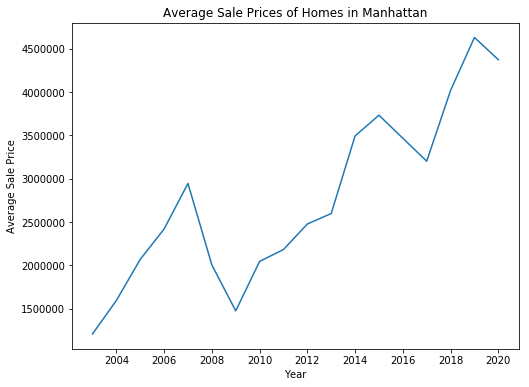

In [67]:
priceGraph(manhattansales, 'Manhattan')

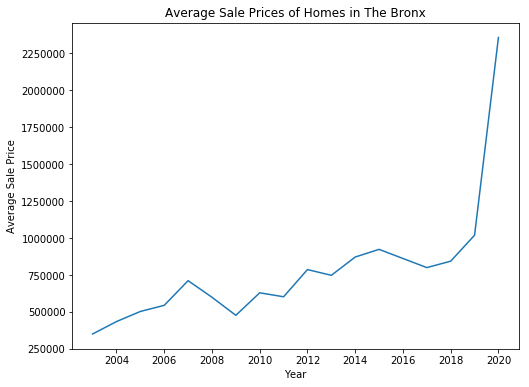

In [42]:
priceGraph(bronxsales, 'The Bronx')

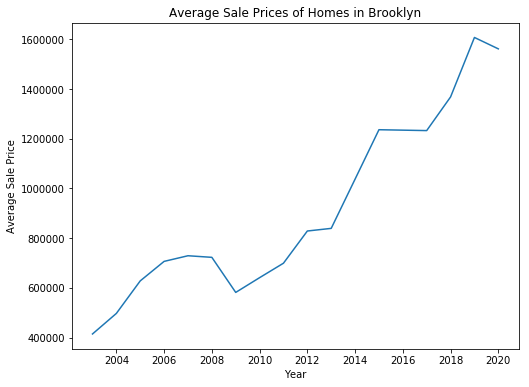

In [43]:
priceGraph(brooklynsales, 'Brooklyn')

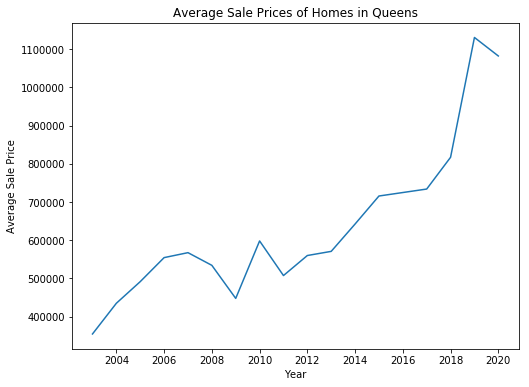

In [44]:
priceGraph(queenssales, 'Queens')

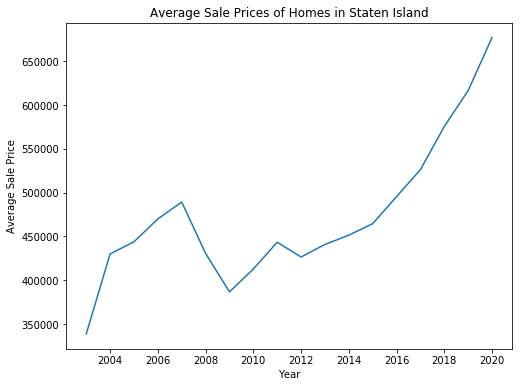

In [45]:
priceGraph(statensales, 'Staten Island')

### Immediate Observations:
For all five boroughs, the average sale prices appear to be growing. Some are growing faster than others, but they are all growing.

This function simplifies the process of creating line graphs showing the change in the amount of buildings being constructed over time

In [46]:
def builtGraph(df, borough):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(df['YearBuilt'], df['NumBuilt'], color='red')
    ax.set_xlabel("Year")
    ax.set_ylabel("New Buildings Built")
    ax.title.set_text("Buildings Built in " + borough)
    plt.show()

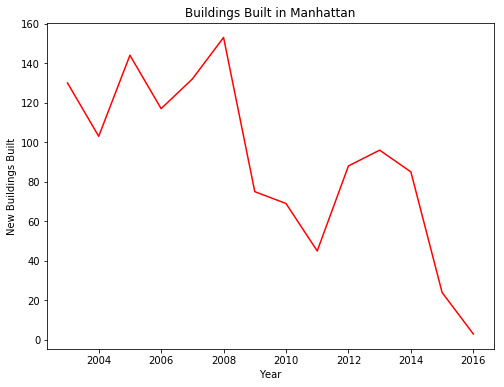

In [47]:
builtGraph(manhattanbuiltfinal, 'Manhattan')

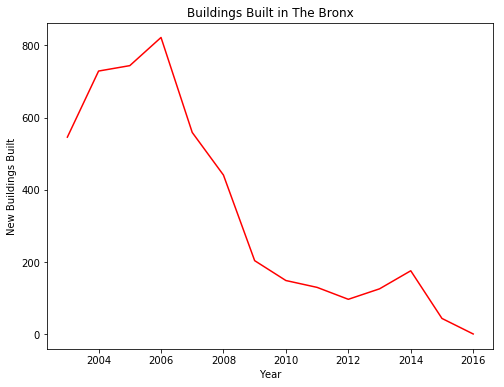

In [48]:
builtGraph(bronxbuiltfinal, 'The Bronx')

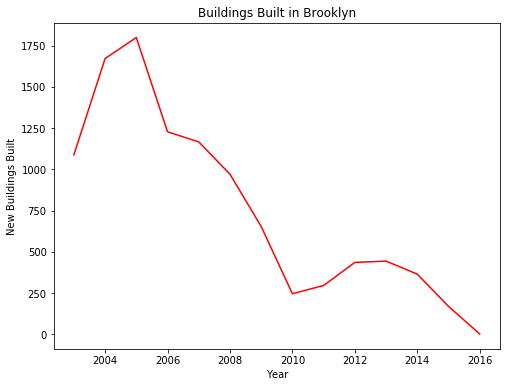

In [49]:
builtGraph(brooklynbuiltfinal, 'Brooklyn')

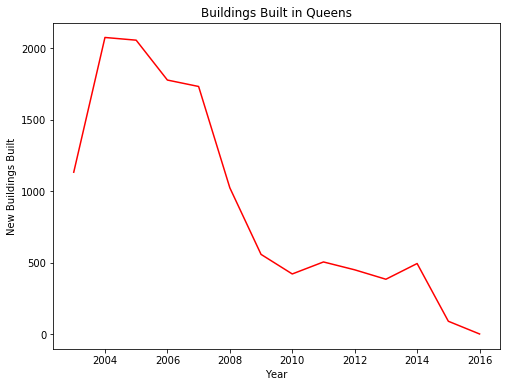

In [50]:
builtGraph(queensbuiltfinal, 'Queens')

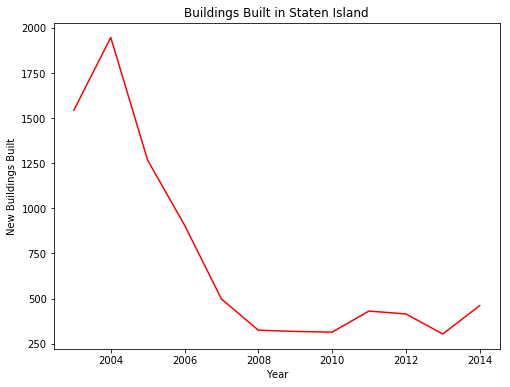

In [51]:
builtGraph(statenbuiltfinal, 'Staten Island')

### Immediate Observations:
All five boroughs have had the number of new buildings constructed every year drop significantly. Combined with the knowledge that all five boroughs had the average sale prices of property rise over the same time period, it is beginning to look like there is some relationship between the two.

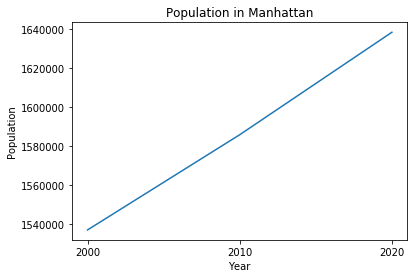

In [52]:
plt.plot(manhattanPops['Year'], manhattanPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Manhattan')
plt.show()

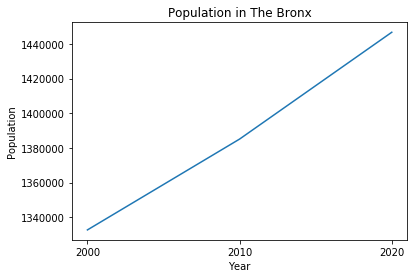

In [53]:
plt.plot(bronxPops['Year'], bronxPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in The Bronx')
plt.show()

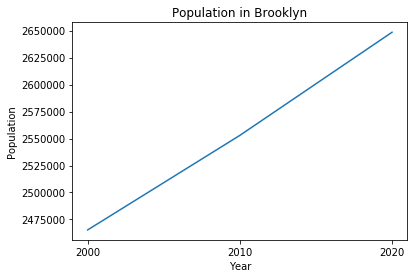

In [54]:
plt.plot(brooklynPops['Year'], brooklynPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Brooklyn')
plt.show()

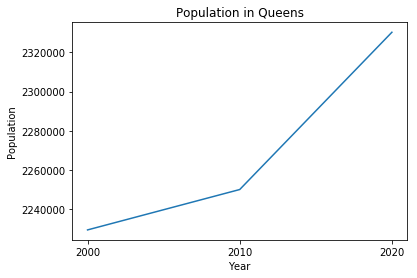

In [55]:
plt.plot(queensPops['Year'], queensPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Queens')
plt.show()

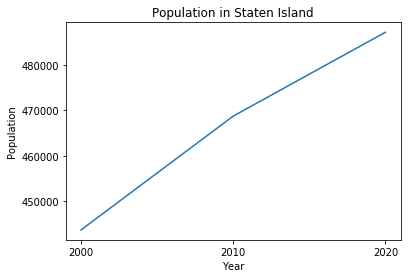

In [56]:
plt.plot(statenPops['Year'], statenPops['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Staten Island')
plt.show()

### Immediate Observations:
Just like in previous visualizations, the trend appears to be shared between all five boroughs. From 2000 to 2020, all five boroughs had a large increase in population.

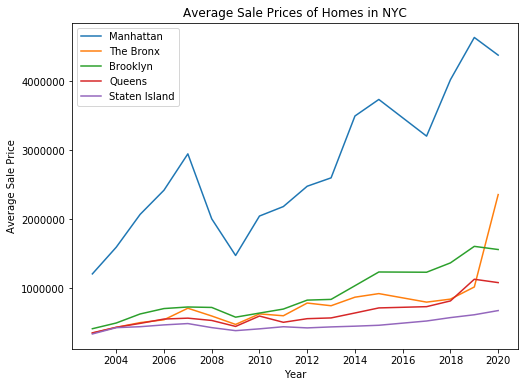

In [57]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattansales['Year'], manhattansales['SALE PRICE'], label='Manhattan')
ax.plot(bronxsales['Year'], bronxsales['SALE PRICE'], label='The Bronx')
ax.plot(brooklynsales['Year'], brooklynsales['SALE PRICE'], label='Brooklyn')
ax.plot(queenssales['Year'], queenssales['SALE PRICE'], label='Queens')
ax.plot(statensales['Year'], statensales['SALE PRICE'], label='Staten Island')
ax.set_xticks(np.arange(2004, 2021, 2))
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price")
ax.title.set_text("Average Sale Prices of Homes in NYC")
ax.legend()
plt.show()

The visualization above reveals something which was originally not so easily visible by having each borough in its own graph. It reveals that Manhattan, despite having the less restrictive residential zoning, as revealed in the earlier visualizations, started off with the highest average sale price. The rest of the boroughs cannot catch up to it, although Bronx does shoot up in strongly in the last year. What's more interesting is that Staten Island, despite having the more restrictive zoning, had the lowest average sale price of all boroughs.

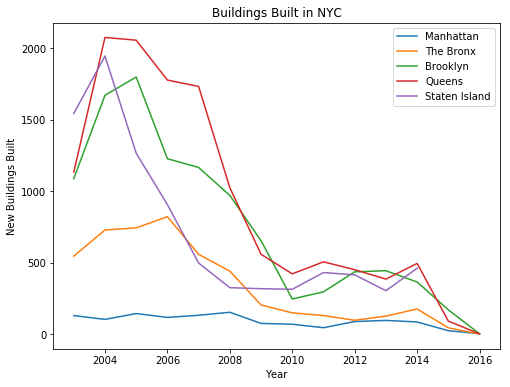

In [58]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattanbuiltfinal['YearBuilt'], manhattanbuiltfinal['NumBuilt'], label='Manhattan')
ax.plot(bronxbuiltfinal['YearBuilt'], bronxbuiltfinal['NumBuilt'], label='The Bronx')
ax.plot(brooklynbuiltfinal['YearBuilt'], brooklynbuiltfinal['NumBuilt'], label='Brooklyn')
ax.plot(queensbuiltfinal['YearBuilt'], queensbuiltfinal['NumBuilt'], label='Queens')
ax.plot(statenbuiltfinal['YearBuilt'], statenbuiltfinal['NumBuilt'], label='Staten Island')
ax.set_xlabel("Year")
ax.set_ylabel("New Buildings Built")
ax.title.set_text("Buildings Built in NYC")
ax.legend()
plt.show()

This line plot further reveals that Manhattan started off with the lowest number of new buildings being constructed, despite having the higher residential zoning. Staten Island, despite being zoned for lower constructions, was up there with Queens and Brooklyn in the number of new buildings being built, before falling down with the rest of the boroughs.

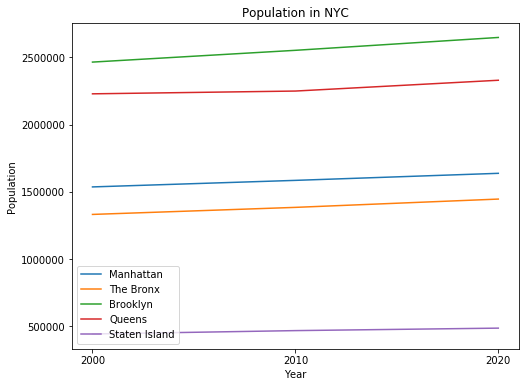

In [59]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(manhattanPops['Year'], manhattanPops['Population'], label='Manhattan')
ax.plot(bronxPops['Year'], bronxPops['Population'], label='The Bronx')
ax.plot(brooklynPops['Year'], brooklynPops['Population'], label='Brooklyn')
ax.plot(queensPops['Year'], queensPops['Population'], label='Queens')
ax.plot(statenPops['Year'], statenPops['Population'], label='Staten Island')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.title.set_text('Population in NYC')
ax.legend()
plt.show()

Each borough experienced an increase in population, although Staten Island's population remains miniscule in comparison to the other boroughs

In [60]:
queensYearly = queens.groupby(['YearBuilt']).size()
brooklynYearly = brooklyn.groupby(['YearBuilt']).size()
bronxYearly = bronx.groupby(['YearBuilt']).size()
manhattanYearly = manhattan.groupby(['YearBuilt']).size()
statenYearly = staten.groupby(['YearBuilt']).size()

This function plots the change in buildings built for the borough specified in the parameters, and then puts a vertical red line for the year 1961, which was the year NYC passed a big zoning resolution, which added a load of regulations to the way buildings were being built.

In [61]:
def plotYearly(df, borough):
    plt.plot(df)
    plt.xlim(1890, 2020)
    plt.xlabel('Year')
    plt.ylabel('Buildings Built')
    plt.title('Buildings Built in ' + borough)
    plt.axvline(x=1961, color='red')
    plt.show()

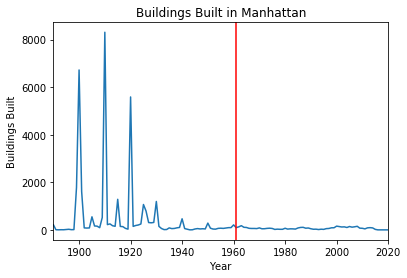

In [62]:
plotYearly(manhattanYearly, 'Manhattan')

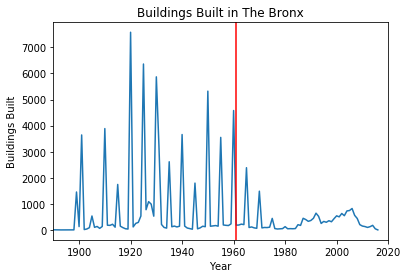

In [63]:
plotYearly(bronxYearly, 'The Bronx')

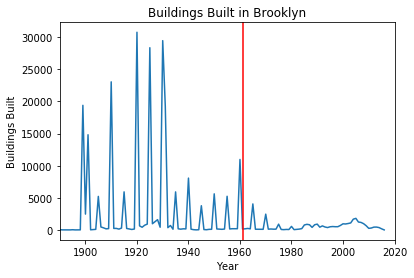

In [64]:
plotYearly(brooklynYearly, 'Brooklyn')

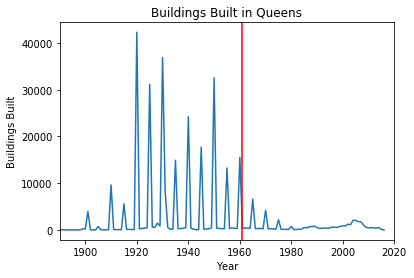

In [65]:
plotYearly(queensYearly, 'Queens')

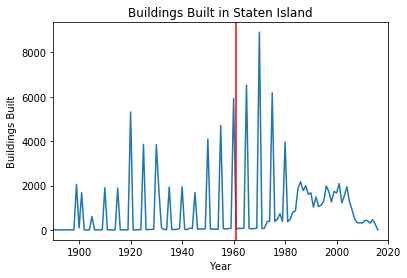

In [66]:
plotYearly(statenYearly, 'Staten Island')

## Conclusion:
By plotting the change in population, average sale prices, and the rate of building construction for each of the five boroughs, I managed to successfully demonstrate the connection between population, rate of construction and sale prices, in that as the number of buildings being constructed goes down, and the population increases, the average cost of housing will go up. To put it another way, as the supply of new housing fails to keep up with the increasing demand of living in NYC, the average cost of housing increases. The relationship between zoning and housing supply, however, was less conclusive. On one hand, the line graphs demonstrating change in the number of new buildings being constructed over time appear to show a decline in the rate of construction after the 1961 NYC Zoning Resolution, which added lots of zoning regulations, and would therefore prove that the decrease was caused directly by the Zoning Resolution. However, a closer inspection reveals some complications. For one, Manhattan had its rate drop about 20 years before the Zoning Resolution came to pass, and the rate did not change after it was passed. Brooklyn saw a decline begin in the 1930s, so even though the rate went down even more after 1961, it is possible that it would've done so even without the NYC Zoning Resolution. For Staten Island, the rate at which buildings were being constructed increased after 1961, which would be a huge counter to the relationship I was trying to prove. Overall, despite successfully showing that as rate of building construction declines, and population increases, so would the average sale price of property, the direct link between increased zoning regulations and housing supply has not been proven, and therefore, the results are inconclusive.

## What went wrong?:
One reason for why the connection between increased zoning regulation and housing supply was failed to be proven is that there are more variables at play that were not included in this project. One example could be the area of the borough. It only makes sense that Manhattan would eventually end up in a stand still when it comes to the construction of new buildings if there is very little space left. Manhattan, for example, is by far the smallest borough in terms of area, with every borough being almost twice as large as it or more. Staten Island occupies over twice as much area, so it only makes sense for it to have more buildings built. This could explain why the rate of new buildings being built in Manhattan slowed down even before the 1961 NYC Zoning Resolution. Another variable that could have had an impact on the results was prior zoning regulations that were passed, which could have been responsible for the decline in housing being built in Brooklyn. Another problem was not taking into account the type of building being built. A ten story building can house more people than a single family detached house can, and failing to do so made it appear as though Manhattan had fewer homes available.

## What Next?
The next steps are to find the rest of the variables which might have had an impact on the results, create additional visualizations using geodata, and create a Linear Regression model from the sklearn library to predict the number of housing built given a zone district category, and to predict the average sale price given a number representing the supply of housing.

## Citations

### Datasets:

[Annual Sales](https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page)

[Buildings built in NYC history](https://www.kaggle.com/new-york-city/nyc-buildings)

[NYC Population](https://www.kaggle.com/new-york-city/new-york-city-population?select=new-york-city-population-by-borough-1950-2040.csv)

### Documentation Resources:

[Matplotlib](https://matplotlib.org/)

[Pandas](https://pandas.pydata.org/docs/)

### Other

[Image Source](https://www1.nyc.gov/site/housing/action/housing.page)

[Information on Each Borough's Area](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City#Background)